In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils
from IPython.display import clear_output

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

public_kwh = APT - month_df['usage (kWh)'].sum()
public_kwh

13330

ECV : 42%


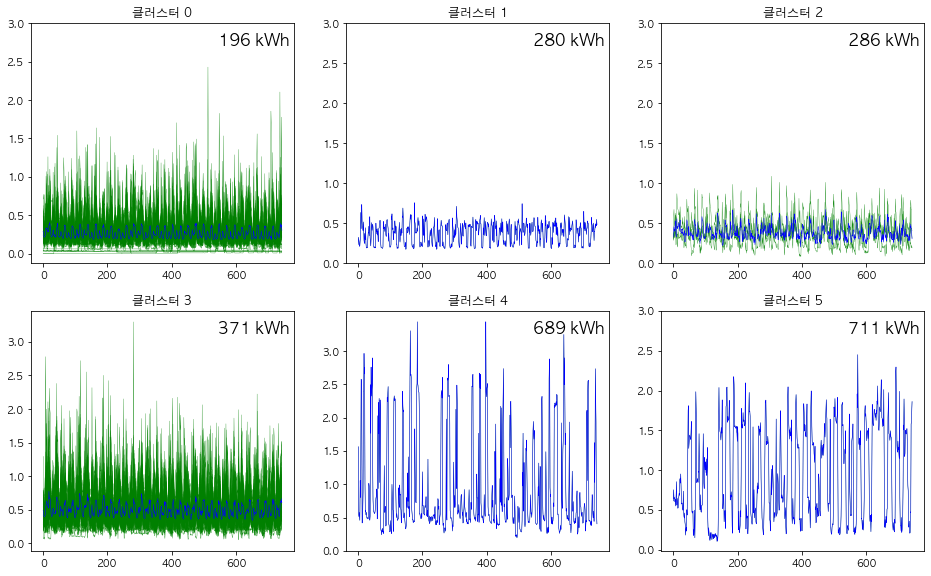

In [48]:
from src import SavingFeedback

sf = SavingFeedback(xlsx)

sf.select_month(1)
sf.kmeans_run()

sf.adjust_anomaly()
anomaly = sf.check_anomaly()
print("이상패턴 조정 확인", len(anomaly) == 0)

clear_output(wait=True)
print("ECV : {}%".format(round(sf.kmeans.ecv * 100)))

sf.kmeans.draw_plot()

In [49]:
time_size = 3

sf.time_based_grouping(time_size)
sf.feedback(td_limit=0.5)

sf.recovery()
sf.result()

In [50]:
sf.recoveries.shape

(108, 744)

In [51]:
sf.datas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0,0.034,0.037,0.062,0.322,0.24,0.295,0.373,0.243,...,0.534,0.188,0.4,0.318,0.42,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.25,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.19,0.227,...,0.275,0.245,0.31,0.423,0.36,0.364,0.212,0.347,0.294,0.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,0.082,0.029,0.027,0.252,0.045,0.295,0.513,1.029,0.01,0.517,...,0.243,0.286,0.791,0.321,0.835,0.492,0.603,0.397,0.307,0.434
2019-01-31 20:00:00,0.07,0.029,0.027,0.338,0.044,0.318,0.556,0.239,0.01,0.444,...,0.325,0.328,0.809,0.458,0.749,0.444,0.339,0.285,0.255,0.451
2019-01-31 21:00:00,0.105,0.029,0.025,0.254,0.044,0.374,0.267,0.204,0.029,0.382,...,0.314,0.625,0.404,0.338,0.519,0.345,0.243,0.27,0.367,0.42
2019-01-31 22:00:00,0.064,0.03,0.028,0.276,0.045,0.304,0.217,0.278,0.01,0.221,...,0.28,0.393,0.363,0.367,0.804,0.577,0.262,0.359,0.351,0.596


ECV : 26%


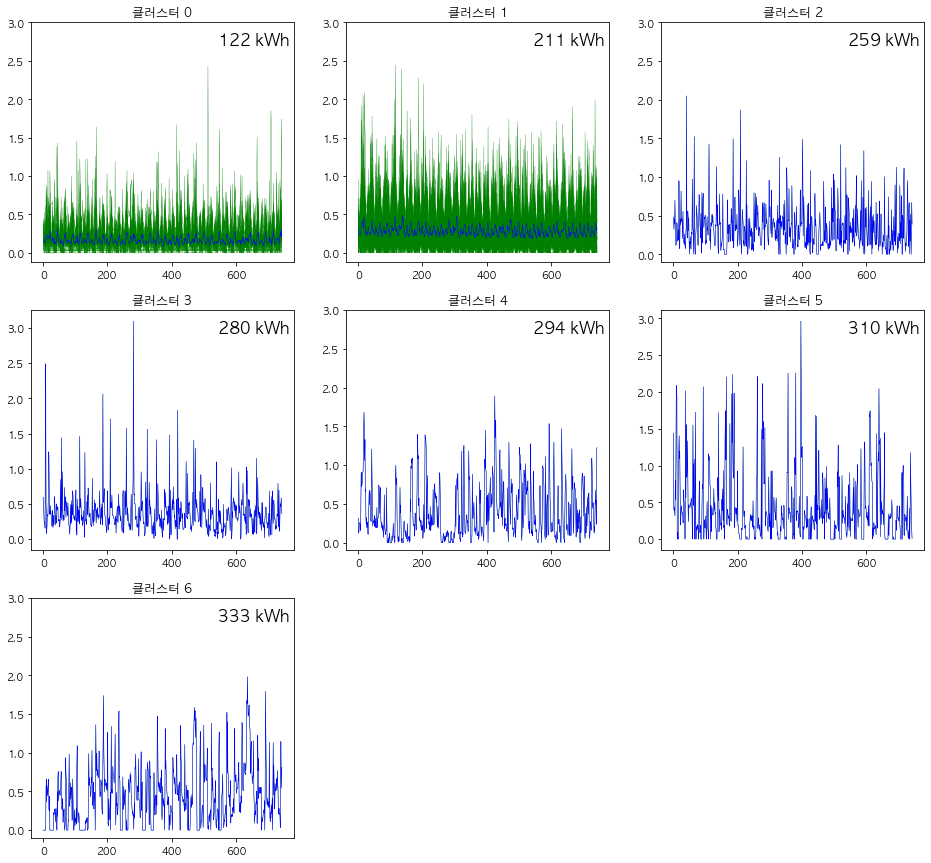

In [74]:
# 다시 실행시킬 때,
sf.datas = pd.DataFrame(sf.recoveries.T, 
             columns=sf.datas.columns, 
             index=sf.datas.index)

sf.kmeans_run()
clear_output(wait=True)
print("ECV : {}%".format(round(sf.kmeans.ecv * 100)))

sf.kmeans.draw_plot()

time_size = 3

sf.time_based_grouping(time_size)
sf.feedback(td_limit=0.5)

sf.recovery()
sf.result()

In [75]:
def get_col_list(kWh, fee):
    col_list = list()
    _usage = kWh
    for step, _f in enumerate(fee):
        collect_rate = _f[1] - _f[0]

        # 2단계일 경우
        if step == 1:
            collect_rate += 1

        if kWh < _f[1]:
            if (step == 0) or (step == 1):
                _col = _usage % collect_rate
            else:
                _col = _usage
        else:
            _col = collect_rate

        if _usage == 0:
            col_list.append(0)
        else:
            col_list.append(_col)
            _usage -= _col

    return np.array(col_list)

def get_step_mem(col_list, fee):
    _mem = list()
    _mem_step = 0
    
    for step,val in enumerate(col_list):
        _val = val
        f = fee[step][3]
        
        while _val != 0:
            _mem_step += f
            _mem.append(_mem_step)
            _val -= 1
            
            
    return np.array(_mem)

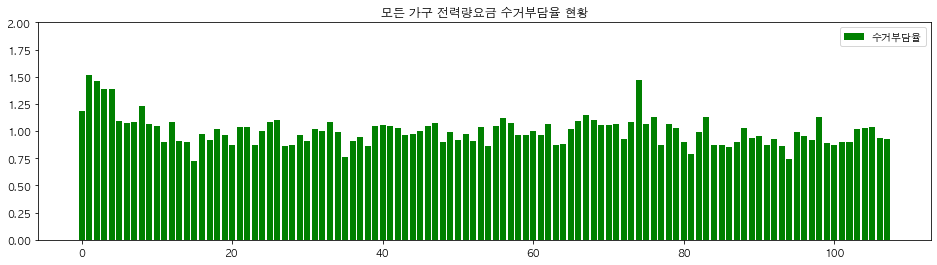

In [76]:
households_col = get_col_list(round(sf.new_group['usage (kWh)'].mean()), calc.fee)
APT_col = get_col_list(round(APT / 108), calc.fee)
public_col = APT_col - households_col
public_mem = get_step_mem(public_col, calc.fee)

col_burden_list = list()

for usage in sf.new_group['usage (kWh)']:
    chk_households_col = get_col_list(usage, calc.fee)
    _APT_mean = usage + public_col.sum()

    chk_APT_col = get_col_list(_APT_mean, calc.fee)
    chk_public_col = chk_APT_col - chk_households_col
    chk_public_mem = get_step_mem(chk_public_col, calc.fee)
    col_burden = public_mem / chk_public_mem
    
    col_burden_list.append(col_burden[-1])
    
plt.figure(figsize=(16,4))

plt.bar(range(len(col_burden_list)), col_burden_list, color='g', label='수거부담율')
plt.yticks(np.arange(0, 2.1, 0.25))
plt.title("모든 가구 전력량요금 수거부담율 현황")

plt.legend()

plt.show()

In [77]:
np.array(col_burden_list).std()

0.1358195967986942

In [98]:
err_check = np.array([])

sf = SavingFeedback(xlsx)

sf.select_month(1)
sf.kmeans_run()

sf.adjust_anomaly()
anomaly = sf.check_anomaly()
print("이상패턴 조정 확인", len(anomaly) == 0)

clear_output(wait=True)
# print("ECV : {}%".format(round(sf.kmeans.ecv * 100)))

time_size = 3

sf.time_based_grouping(time_size)
sf.feedback(td_limit=0.5)

sf.recovery()
sf.result()

for case in range(0, 10):
    households_col = get_col_list(round(sf.new_group['usage (kWh)'].mean()), calc.fee)
    APT_col = get_col_list(round(APT / 108), calc.fee)
    public_col = APT_col - households_col
    public_mem = get_step_mem(public_col, calc.fee)

    col_burden_list = list()
    
    for usage in sf.group['usage (kWh)']:
        chk_households_col = get_col_list(usage, calc.fee)
        _APT_mean = usage + public_col.sum()

        chk_APT_col = get_col_list(_APT_mean, calc.fee)
        chk_public_col = chk_APT_col - chk_households_col
        chk_public_mem = get_step_mem(chk_public_col, calc.fee)
        col_burden = public_mem / chk_public_mem

        col_burden_list.append(col_burden[-1])
        
    err_check = np.append(err_check, np.array(col_burden_list).std())

    sf.datas = pd.DataFrame(sf.recoveries.T, 
                 columns=sf.datas.columns, 
                 index=sf.datas.index)

    sf.kmeans_run()
    clear_output(wait=True)

    time_size = 3

    sf.time_based_grouping(time_size)
    sf.feedback(td_limit=0.5)

    sf.recovery()
    sf.result()

ECV : 18 %


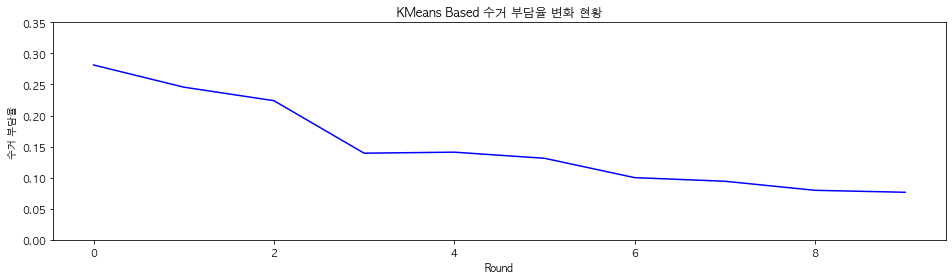

In [100]:
plt.figure(figsize=(16,4))
plt.title("KMeans Based 수거 부담율 변화 현황")

plt.plot(err_check, color='b')
plt.xlabel("Round")
plt.ylabel("수거 부담율")
plt.yticks(np.arange(0,0.4, 0.05))

plt.show()